# Анализ оттока клиентов банка

*Выпускной проект Яндекс Практикума. Часть I*

**Цель:** разработка нового решения по сегментации клиентов и создание рекомендаций по снижению оттока.

Данные: датасет с данными о клиентах банка «Метанпром» в трех филиалах — Ярославле, Ростове Великом и Рыбинске.

Заказчик: отдел маркетинга.

**Задачи:**
- EDA: изучить распределение признаков, в т. ч. в разрезе оттока,
- статистический тест: гипотеза о связи оттока и дохода клиентов, 
- статистический тест: сформулировать и проверить гипотезу по результатам EDA,
- выделить не менее 3 сегментов клиентов — в каждом не менее 500 клиентов, уровень оттока выше, чем в среднем по банку,
- приоритизировать сегменты и сформулировать рекомендации по удержанию отточных клиентов.

**Материалы:**
- [презентация](https://drive.google.com/file/d/139fntxnOUHqHD6i0cq5Qj8IqQciwl61u/view?usp=sharing)
- [дашборд](https://public.tableau.com/app/profile/olga.khandarova/viz/Book2_16894207205190/Dashboard1)

<a id='table'></a>

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-Обзор-данных" data-toc-modified-id="1-Обзор-данных-1">1 Обзор данных</a></span></li><li><span><a href="#2-Предобработка-данных" data-toc-modified-id="2-Предобработка-данных-2">2 Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#2.1-переименование-столбцов" data-toc-modified-id="2.1-переименование-столбцов-2.1">2.1 переименование столбцов</a></span></li><li><span><a href="#2.2-аномалии" data-toc-modified-id="2.2-аномалии-2.2">2.2 аномалии</a></span></li><li><span><a href="#2.3-пропуски" data-toc-modified-id="2.3-пропуски-2.3">2.3 пропуски</a></span></li><li><span><a href="#2.4-дубликаты" data-toc-modified-id="2.4-дубликаты-2.4">2.4 дубликаты</a></span></li><li><span><a href="#2.5-типы-данных" data-toc-modified-id="2.5-типы-данных-2.5">2.5 типы данных</a></span></li><li><span><a href="#2.6-кодирование" data-toc-modified-id="2.6-кодирование-2.6">2.6 кодирование</a></span></li><li><span><a href="#2.7-вывод" data-toc-modified-id="2.7-вывод-2.7">2.7 вывод</a></span></li></ul></li><li><span><a href="#3-EDA" data-toc-modified-id="3-EDA-3">3 EDA</a></span><ul class="toc-item"><li><span><a href="#3.1-общее-распределение-признаков" data-toc-modified-id="3.1-общее-распределение-признаков-3.1">3.1 общее распределение признаков</a></span></li><li><span><a href="#3.2-анализ-признаков-в-разрезе-оттока" data-toc-modified-id="3.2-анализ-признаков-в-разрезе-оттока-3.2">3.2 анализ признаков в разрезе оттока</a></span></li><li><span><a href="#3.3-портреты-клиента-в-разрезе-оттока" data-toc-modified-id="3.3-портреты-клиента-в-разрезе-оттока-3.3">3.3 портреты клиента в разрезе оттока</a></span></li><li><span><a href="#3.4-корреляционный-анализ" data-toc-modified-id="3.4-корреляционный-анализ-3.4">3.4 корреляционный анализ</a></span></li><li><span><a href="#3.5-вывод" data-toc-modified-id="3.5-вывод-3.5">3.5 вывод</a></span></li></ul></li><li><span><a href="#4-Статистический-анализ" data-toc-modified-id="4-Статистический-анализ-4">4 Статистический анализ</a></span><ul class="toc-item"><li><span><a href="#4.1-гипотеза-о-связи-оттока-и-дохода-клиентов" data-toc-modified-id="4.1-гипотеза-о-связи-оттока-и-дохода-клиентов-4.1">4.1 гипотеза о связи оттока и дохода клиентов</a></span></li><li><span><a href="#4.2-гипотеза-о-связи-оттока-и-скоринга" data-toc-modified-id="4.2-гипотеза-о-связи-оттока-и-скоринга-4.2">4.2 гипотеза о связи оттока и скоринга</a></span></li><li><span><a href="#4.3-вывод" data-toc-modified-id="4.3-вывод-4.3">4.3 вывод</a></span></li></ul></li><li><span><a href="#5-Сегментация" data-toc-modified-id="5-Сегментация-5">5 Сегментация</a></span><ul class="toc-item"><li><span><a href="#5.1-выделение-признаков" data-toc-modified-id="5.1-выделение-признаков-5.1">5.1 выделение признаков</a></span></li><li><span><a href="#5.2-комбинирование" data-toc-modified-id="5.2-комбинирование-5.2">5.2 комбинирование</a></span></li><li><span><a href="#5.3-приоритизация" data-toc-modified-id="5.3-приоритизация-5.3">5.3 приоритизация</a></span></li><li><span><a href="#5.4-вывод" data-toc-modified-id="5.4-вывод-5.4">5.4 вывод</a></span></li></ul></li><li><span><a href="#6-Итог-и-рекомендации" data-toc-modified-id="6-Итог-и-рекомендации-6">6 Итог и рекомендации</a></span><ul class="toc-item"><li><span><a href="#6.1-Общие-результаты-исследования" data-toc-modified-id="6.1-Общие-результаты-исследования-6.1">6.1 Общие результаты исследования</a></span></li><li><span><a href="#6.2-Рекомендации-по-сегментам" data-toc-modified-id="6.2-Рекомендации-по-сегментам-6.2">6.2 Рекомендации по сегментам</a></span></li></ul></li></ul></div>

## 1 Обзор данных 

<a id='1-Обзор-данных-1'></a>

In [1]:
import math as mth
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import itertools

from matplotlib import pyplot as plt
from itertools import combinations

import phik
from phik.report import plot_correlation_matrix

pd.set_option('mode.chained_assignment', None)

Откроем датасет и сохраним данные в переменной.

In [2]:
data = pd.read_csv('bank_scrooge.csv')
    
display(data.head())
data.info()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


[назад в оглавление](#table)

## 2 Предобработка данных

### 2.1 переименование столбцов

Переименуем столбцы для удобства работы.

In [3]:
data.columns = data.columns.str.lower()
data.rename(columns = {'userid':'id'}, inplace = True)

### 2.2 аномалии

Проверим данные в столбце `products`.

In [4]:
data['products'].value_counts()

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

Количество банковских продуктов клиента банка не может быть равно 0, заменим запись на 1.

In [5]:
data.loc[data['products'] == 0, 'products'] = 1

### 2.3 пропуски

Оценим количество пропусков.

In [6]:
print('Процент пропусков в столбе age:', round(data['age'].isna().sum() / data['id'].count() * 100, 2))
print('Процент пропусков в столбе balance:', round(data['balance'].isna().sum() / data['id'].count() * 100, 2))

Процент пропусков в столбе age: 0.26
Процент пропусков в столбе balance: 22.95


Количество пропусков в столбце `age` настолько мало — 0,26%, что оценивать их распределение по разным группам не имеет смысла, поскольку велика вероятность получить ложные зависимости. Восстановить их логически или заполнить средними / медианными значениями невозможно. Отнесем эти пропуски к категории MCAR и удалим из датасета.

In [7]:
data = data[~(data['age'].isna())]

Посмотрим, как распределены пропуски столбца `balance` по разным группам в соответствии с категориальными и бинарными признаками.

In [8]:
for i in ['city', 'gender', 'products', 'equity', 'credit_card', 'last_activity', 'churn']:
    nan = (
        data
        .groupby(i)
        .agg(count=('id', 'count'))
        .merge(data[data['balance'].isna()]
               .groupby(i)
               .agg(nan=('id', 'count')), on=i)
    )
    nan['share_%'] = round(nan['nan'] / nan['count'] * 100, 2)
    print(f'Распределение пропусков в столбце «balance» по группам в соответствии с «{i}»:')
    display(nan)
    print('')

Распределение пропусков в столбце «balance» по группам в соответствии с «city»:


,count,nan,share_%
city,,,
Ростов,1416,235,16.60
Рыбинск,2683,586,21.84
Ярославль,5875,1458,24.82



Распределение пропусков в столбце «balance» по группам в соответствии с «gender»:


,count,nan,share_%
gender,,,
Ж,4983,1007,20.21
М,4991,1272,25.49



Распределение пропусков в столбце «balance» по группам в соответствии с «products»:


,count,nan,share_%
products,,,
1,3324,1935,58.21
2,5119,315,6.15
3,1038,29,2.79



Распределение пропусков в столбце «balance» по группам в соответствии с «equity»:


,count,nan,share_%
equity,,,
0,2576,2164,84.01
1,773,114,14.75
3,1541,1,0.06



Распределение пропусков в столбце «balance» по группам в соответствии с «credit_card»:


,count,nan,share_%
credit_card,,,
0,3190,421,13.20
1,6784,1858,27.39



Распределение пропусков в столбце «balance» по группам в соответствии с «last_activity»:


,count,nan,share_%
last_activity,,,
0,4759,1028,21.60
1,5215,1251,23.99



Распределение пропусков в столбце «balance» по группам в соответствии с «churn»:


,count,nan,share_%
churn,,,
0,8155,2266,27.79
1,1819,13,0.71


Есть ряд признаков, связь которых с пропусками в столбце `balance` сильнее, чем остальные. В их числе отметим: 
- 1 банковский продукт,
- 0 баллов собственности,
- наличие кредитной карты,
- лояльность.

Логически заполнить пропуски также невозможно, а удаление повлияет на выборку не только из-за большой их доли в датасете (22,95%), но и исказит группы, в особенности по признаку оттока. Отнесем пропуски к категории MNAR и оставим как есть. Учтем, что основная доля их — в группе лояльных клиентов.

### 2.4 дубликаты

Проверим датасет на явные дубликаты.

In [9]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


Проведем проверку на неполные дубликаты.

In [10]:
print('Количество дубликатов по id:', data[['id']].duplicated().sum())

Количество дубликатов по id: 50


Проверим, совпадает ли у дублирующихся `id` какой-либо другой признак, явно идентифицирующий пользователя. В нашем случае подойдет столбец `city`.

In [11]:
print('Количество дубликатов по id и city:', data[['id', 'city']].duplicated().sum())

Количество дубликатов по id и city: 0


Все дублирующиеся `id` относятся к разным городам. Посмотрим на первые строки.

In [12]:
data[data['id'].duplicated(keep=False)].sort_values(by=['id', 'city']).head(20)

,id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1


Мы убедились, что записи с одинаковым `id`, относящиеся к разным городам, не совпадают, это не полные дубликаты. Обратим внимание, что в первых строках не совпадают значения `churn` для разных городов с одинаковым `id`. Проверим, сколько в этом наборе неполных дубликатов отточных записей и сколько уникальных отточных записей.

In [13]:
print('Всего отточных записей:', data[(data['id'].duplicated(keep=False)) &
                                      (data['churn'] == 1)]['id'].count())
print('Всего уникальных отточных записей:', data[(data['id'].duplicated(keep=False)) &
                                      (data['churn'] == 1)]['id'].nunique())

Всего отточных записей: 50
Всего уникальных отточных записей: 50


В каждой паре дублирующихся `id` есть запись ушедшего клиента из одного города и оставшегося клиента из другого. То есть `id` ушедшего клиента в Рыбинске попал действующему клиенту из Ярославля и наоборот. 

Дальнейшему анализу это не помешает. Оставим неполные дубликаты без изменений.

### 2.5 типы данных

Для удобства приведем типы данных, там где это возможно, к целочисленному значению. Это, очевидно, столбец `age` и, судя по первым строкам датасета, столбец `score`. Проверим, как выглядят значения в столбце `score`.

In [14]:
data['score'].sort_values()

2532     642.0
7066     642.0
921      646.0
5131     646.0
4071     648.0
         ...  
6948    1000.0
125     1000.0
4721    1000.0
1027    1000.0
3348    1000.0
Name: score, Length: 9974, dtype: float64

Значения действительно можно привести к целочисленным.

In [15]:
data[['score', 'age']] = data[['score', 'age']].astype('int')

### 2.6 кодирование

Закодируем два столбца с категориальными данными (город и пол) для последующего корелляционного анализа.

In [16]:
data[['rostov', 'rybinsk', 'yaroslavl', 'female', 'male']] = pd.get_dummies(data[['city', 'gender']])

### 2.7 вывод

Датасет в 10 000 строк предобработан следующим образом:
- удалены строки с пропусками в столбце `age` (менее 1 процента данных),
- исправлена 1 аномальная запись с 0 банковских продуктов,
- исследован характер пропусков в столбце `balance`,
- проведена проверка на полные и неполные дубликаты,
- приведены типы данных к целочисленному в двух столбцах,
- закодированы данные в столбцах `city` и `gender`.

Выведем информацию об обработанном датасете.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9974 non-null   int64  
 1   score          9974 non-null   int32  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int32  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  rostov         9974 non-null   uint8  
 13  rybinsk        9974 non-null   uint8  
 14  yaroslavl      9974 non-null   uint8  
 15  female         9974 non-null   uint8  
 16  male           9974 non-null   uint8  
dtypes: float64(2), int32(2), int64(6), object(2), uint8(

[назад в оглавление](#table)

## 3 EDA

### 3.1 общее распределение признаков

Вначале посмотрим на общий характер распределения данных.

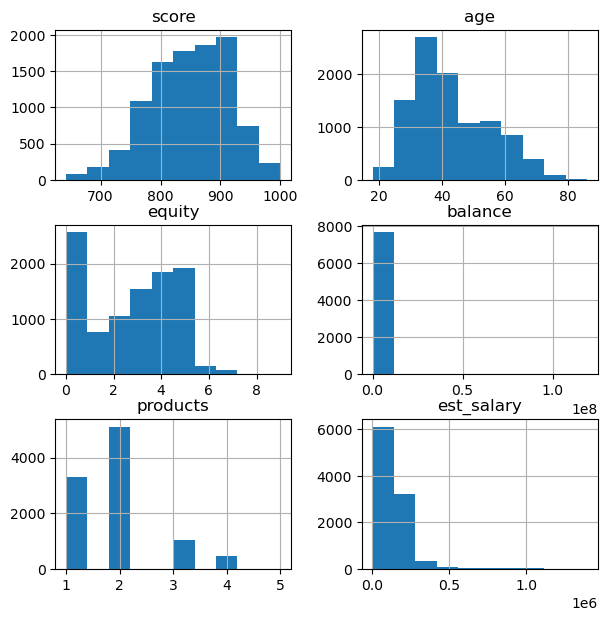

In [18]:
data[['score', 'age', 'equity', 'balance', 'products', 'est_salary']].hist(figsize=(7, 7));

Столбцы `score`, `age`, `entity` и `products` — без очевидных аномалий. Можно отметить, что линейка баллов скоринга на практике составляет от 600 до 1000 баллов.

В столбцах `balance` особенно, а также `est_salary` есть значительные выбросы, поэтому будем смотреть на медианные значения.

Теперь выведем точные значения.

In [19]:
round(data[['score', 'age', 'equity', 'products', 'balance', 'est_salary']].describe(), 0)

,score,age,equity,products,balance,est_salary
count,9974.0,9974.0,9974.0,9974.0,7695.0,9974.0
mean,849.0,43.0,3.0,2.0,827246.0,147787.0
std,65.0,12.0,2.0,1.0,1980327.0,139286.0
min,642.0,18.0,0.0,1.0,0.0,2546.0
25%,802.0,33.0,0.0,1.0,295699.0,75252.0
50%,853.0,40.0,3.0,2.0,524295.0,119627.0
75%,900.0,51.0,4.0,2.0,980051.0,174500.0
max,1000.0,86.0,9.0,5.0,119113552.0,1395064.0


При аналице признаков `balance` и `est_salary` в разрезе оттока нужно установить потолок.

In [20]:
perc_balance = np.nanpercentile(data['balance'], [95, 97.5, 99])
perc_salary = np.nanpercentile(data['est_salary'], [95, 97.5, 99])

print('Потолок для столбца «balance»:', round(perc_balance[0], 0))
print('Потолок для столбца «est_salary»:', round(perc_salary[0], 0))

Потолок для столбца «balance»: 2114078.0
Потолок для столбца «est_salary»: 316361.0


Выведем доли для бинарных значений.

In [21]:
print('Доля владельцев кредитной карты:', round(data['credit_card'].mean(), 2))
print('Доля активных клиентов:', round(data['last_activity'].mean(), 2))
print('Доля оттока:', round(data['churn'].mean(), 2))

Доля владельцев кредитной карты: 0.68
Доля активных клиентов: 0.52
Доля оттока: 0.18


Кредитной картой владеет две трети клиентов. Активных и неактивных клиентов примерно поровну. Отток составляет 18%.

Oценим распределение по городу и полу.

In [22]:
for i in ['city', 'gender']:
    i = (
        data
        .groupby(i)
        .agg(count=('id', 'count'))
        .sort_values(by='count', ascending=False)
        .reset_index()
    )
    i['share'] = round(i['count'] / data['id'].count(), 2)
    display(i) 

,city,count,share
0,Ярославль,5875,0.59
1,Рыбинск,2683,0.27
2,Ростов,1416,0.14


,gender,count,share
0,М,4991,0.5
1,Ж,4983,0.5


Больше половины клиентов обслуживаются в отделении в Ярославле. Мужчин и женщин в датасете поровну.

### 3.2 анализ признаков в разрезе оттока

Выведем графики непрерывных признаков в разрезе оттока.

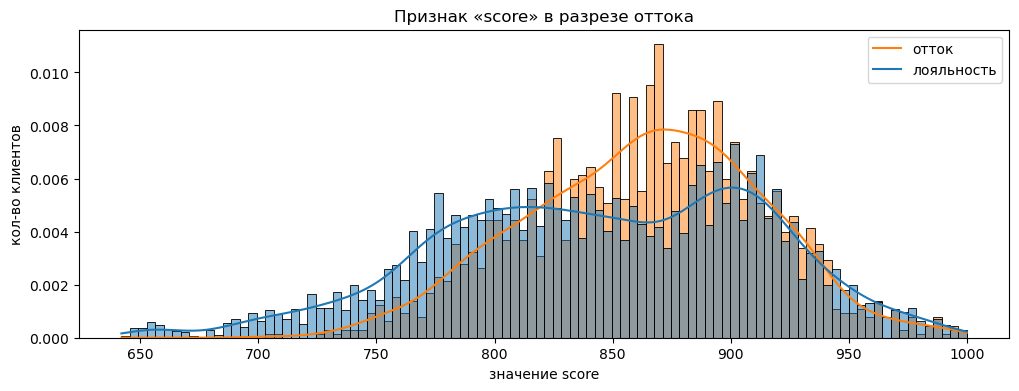

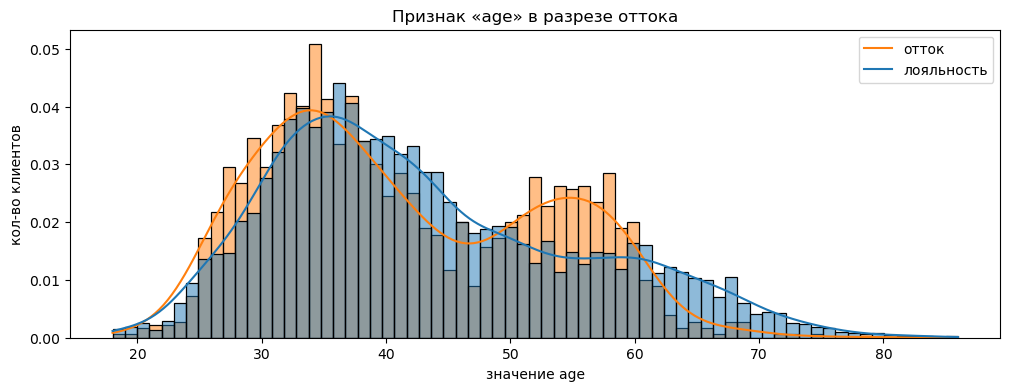

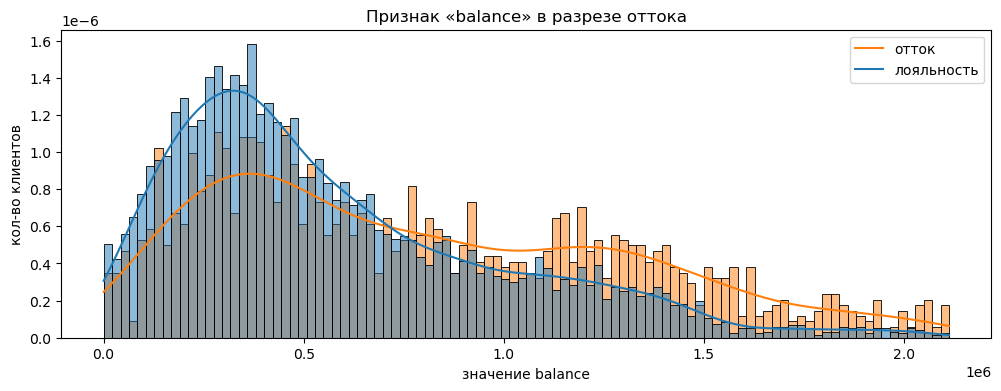

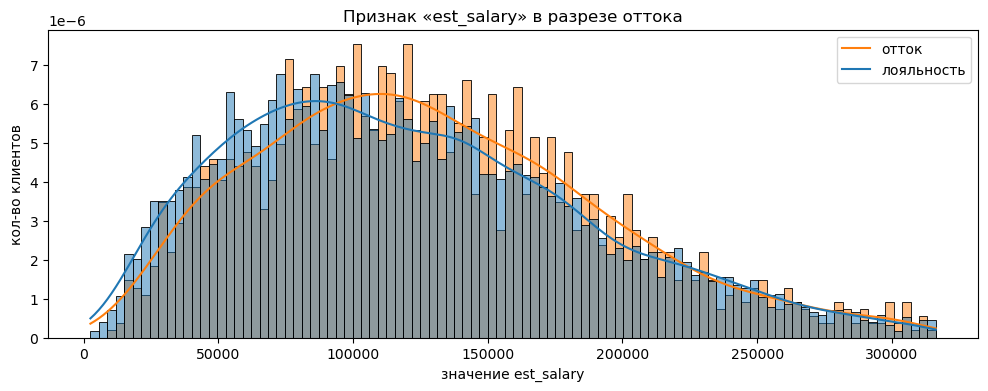

In [23]:
for item in ['score', 'age', 'balance', 'est_salary']:
    bins = 100
    limit = perc_salary[0]
    if item == 'balance': 
        limit = perc_balance[0]
    elif item == 'age':
        bins = data['age'].max() - data['age'].min() + 1
    plt.figure(figsize=(12, 4))
    sns.histplot(data[data[item] < limit], x=item, hue='churn', stat='density', kde=True, common_norm=False, bins=bins)
    plt.title(f'Признак «{item}» в разрезе оттока')
    plt.legend(['отток', 'лояльность'])
    plt.ylabel('кол-во клиентов')
    plt.xlabel(f'значение {item}')
    plt.show()

Определяем интервалы, на которых отток выше, чем лояльность:
- для скоринга: 820-940 баллов,
- для возраста: 25-35 лет, 50-60 лет,
- для баланса: от 750 тыс,
- для зарплаты: от 100 тыс.

Выведем графики для дискретных и бинарных признаков в разрезе оттока.

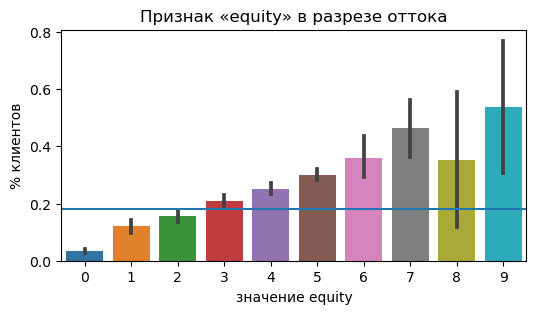

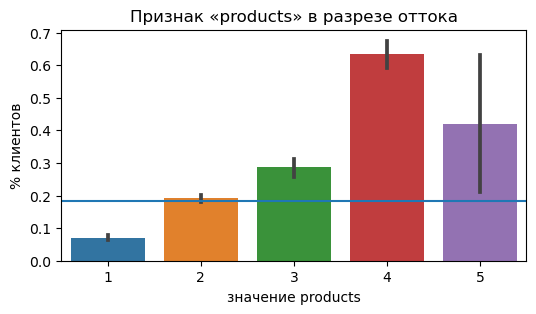

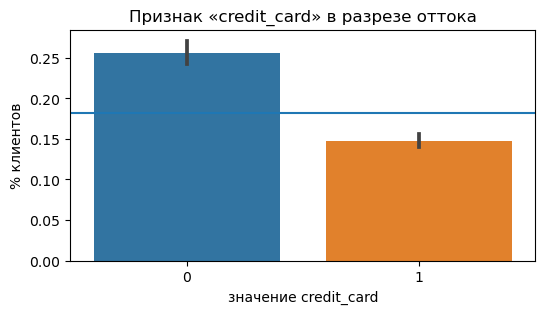

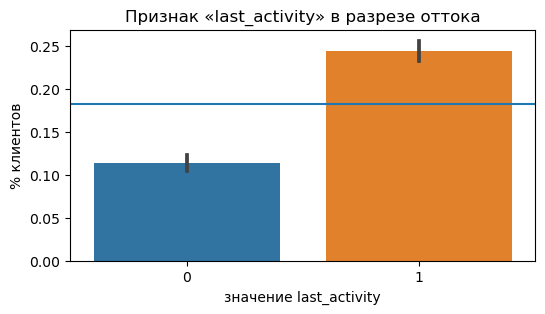

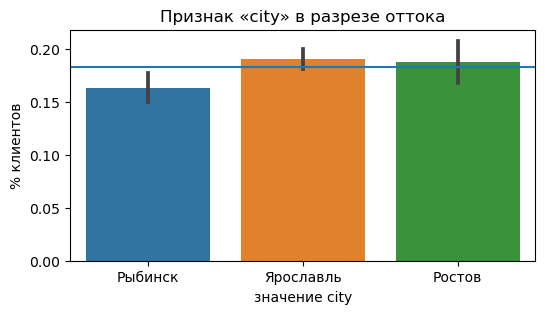

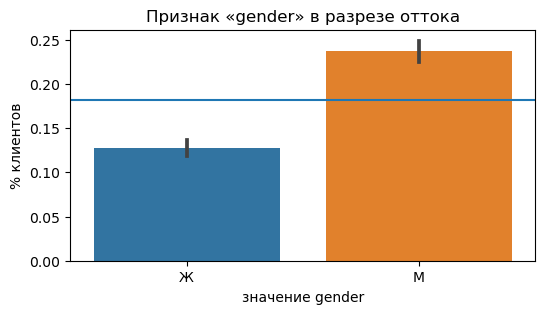

In [24]:
for item in ['equity', 'products', 'credit_card', 'last_activity', 'city', 'gender']:
    plt.figure(figsize=(6, 3))
    sns.barplot(data=data, x=item, y='churn')
    plt.axhline(data['churn'].mean())
    plt.title(f'Признак «{item}» в разрезе оттока')
    plt.ylabel('% клиентов')
    plt.xlabel(f'значение {item}')
    plt.show()

Определяем значения, влияющие на отток:
- баллы собственности: от 3 и выше,
- количество продуктов: от 3,
- отсутствие кредитной карты,
- наличие активности в последний период,
- мужской пол.

Город проживания является единственным признаком не влияющим на отток.

### 3.3 портреты клиента в разрезе оттока

Составим общие портреты оставшегося и ушедшего клиентов.

In [25]:
churn = (
    data
    .groupby('churn')
    .agg(возраст_ср=('age', 'mean'), 
         скоринг_ср=('score', 'mean'),
         баланс_ср=('balance', 'mean'),
         баланс_медиана=('balance', 'median'),
         зарплата_ср=('est_salary', 'mean'),
         зарплата_медиана=('est_salary', 'median'),
         баллы_собственности_медиана=('equity', 'median'),
         продукты_медиана=('products', 'median'),
         кредитная_карта_доля=('credit_card', 'mean'), 
         последняя_активность_доля=('last_activity', 'mean')
         )
)
churn['город_мода'] = data.groupby('churn')['city'].apply(lambda x: x.mode().iloc[0])
churn['пол_мода'] = data.groupby('churn')['gender'].apply(lambda x: x.mode().iloc[0])

churn = churn.round(2)

churn = churn.T
churn.rename(columns = {0:'лояльность', 1: 'отток'}, inplace = True)

churn

churn,лояльность,отток
возраст_ср,43.02,41.45
скоринг_ср,845.4,863.42
баланс_ср,733031.63,1134458.21
баланс_медиана,475410.09,783908.9
зарплата_ср,147674.64,148289.7
зарплата_медиана,118227.6,125395.22
баллы_собственности_медиана,3.0,4.0
продукты_медиана,2.0,2.0
кредитная_карта_доля,0.71,0.55
последняя_активность_доля,0.48,0.7


Выделим признаки, явно различающие общие портреты ушедших и оставшихся клиентов:
- медианная сумма на балансе у ушедших клиентов значительно выше,
- наличие кредитной карты у 71% оставшихся и у 55% ушедших,
- активность за последний период у 48% оставшихся и 70% ушедших,
- мужской пол преобладает среди ушедших клиентов.

Отметим признаки, менее явно выраженные:
- средний возраст,
- средний скоринг,
- медианная зарплата,
- медианный балл собственности.

Признаки, не разделяющие общие портреты ушедших и оставшихся клиентов:
- количество банковских продуктов,
- город обслуживания.

### 3.4 корреляционный анализ

Подготовим датасет для корреляционного анализа с помощью библиотеки `phik`.

In [26]:
data_corr = data[['score', 'age', 'equity', 'balance', 'products', 
                  'credit_card', 'last_activity', 'est_salary', 'churn', 
                  'rostov', 'rybinsk', 'yaroslavl', 'female', 'male']]

interval_cols = ['score', 'age', 'balance', 'est_salary']

matrix_phik = data_corr.phik_matrix(interval_cols=interval_cols)

Построим полную матрицу коррелляций признаков.

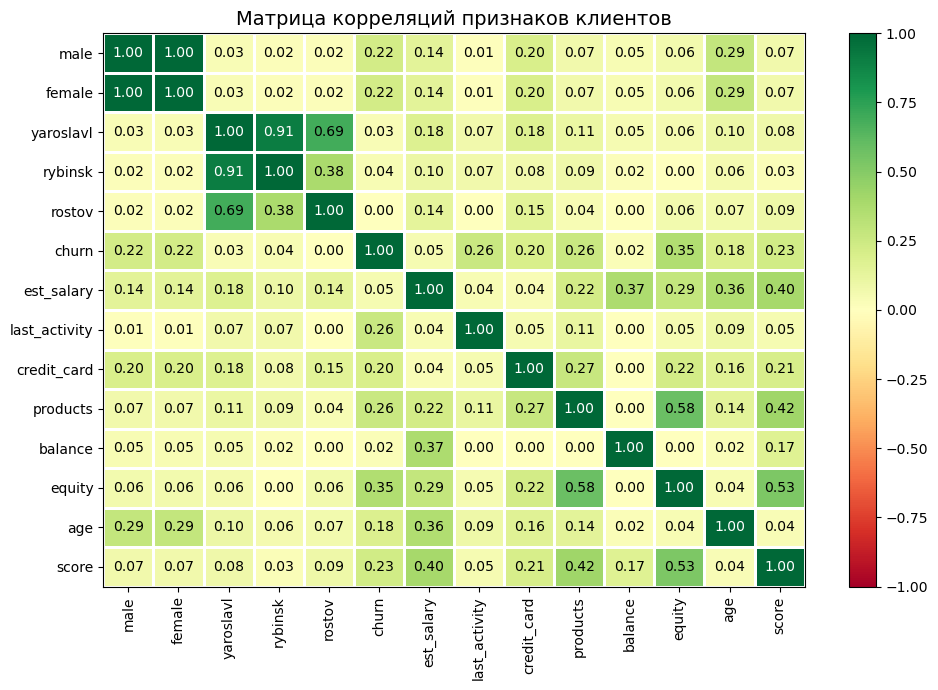

In [27]:
plot_correlation_matrix(matrix_phik.values, 
                        x_labels=matrix_phik.columns, 
                        y_labels=matrix_phik.index, 
                        title='Матрица корреляций признаков клиентов', 
                        figsize=(10, 7)
                       )

В матрице выделяется 2 признака, хорошо описываемых умеренными корреляциями по шкале Чеддока:
- скоринг коррелирует с баллами собственности (0,53), количеством продуктов (0,42) и зарплатой (0,4),
- зарплата коррелирует со скорингом (0,4), балансом (0,37) и возрастом (0,36).
 
Также обращает внимание заметная корреляция между наличием кредитной карты и количеством банковских продуктов (0,58).

Для интересующего нас признака оттока предварительно выделим следующие корреляции:
- умеренная: баллы собственности (0,35),
- слабые: наличие активности за последний период (0,26), количество банковских продуктов (0,26), скоринг (0,23).

Для уточнения корреляций признака оттока выведем отдельно этот столбец и построим в дополнение график корреляции по Пирсону, чтобы правильно определить направления.

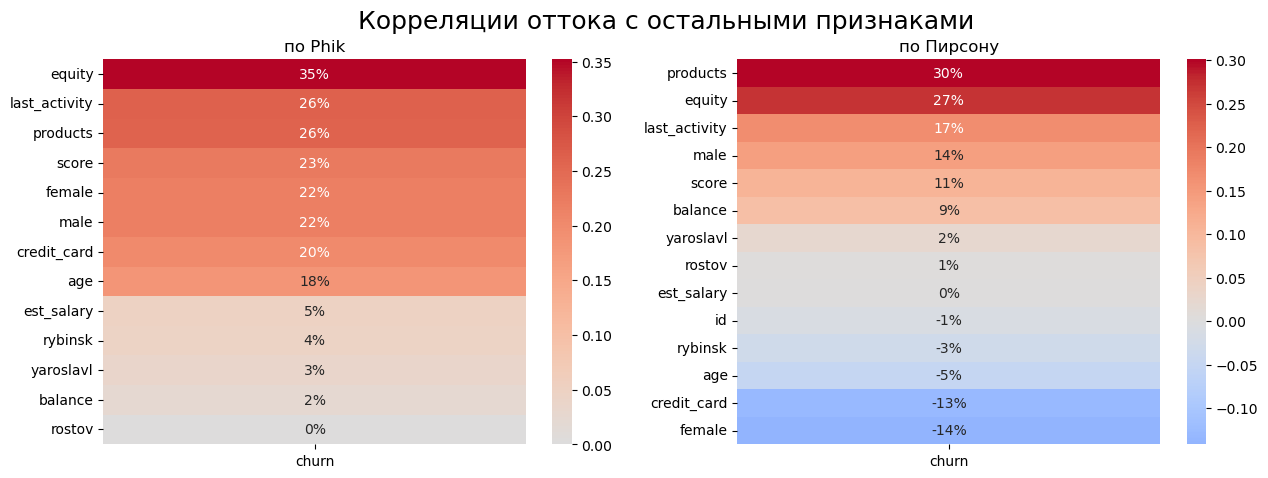

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.suptitle('Корреляции оттока с остальными признаками', fontsize=18)

i = 0
for dataset, name in [[matrix_phik, 'по Phik'], [data.corr(), 'по Пирсону']]:
    fig = sns.heatmap(dataset.loc[:, ['churn']].drop('churn').sort_values(by='churn', ascending=False),
                      annot=True,
                      fmt='.0%',
                      cmap='coolwarm', 
                      center=0,
                      ax=axes[i])
    fig.set_title(name)
    i =+ 1

С учетом направлений, оценим полную картину корелляций для оттока по шкале Чеддока:
- умеренная положительная: баллы собственности,
- слабая положительная: активность за последний период, количество продуктов, скоринг, мужской пол,
- слабая отрицательная: женский пол, наличие кредитной карты, возраст.

Признаки, которые не коррелируют с оттоком, это город, сумма средств на балансе и зарплата.

### 3.5 вывод

1. Общее распределение признаков в датасете:
- данные в столбцах `score`, `age`, `entity` и `products` — без очевидных аномалий,
- в столбцах `balance` и `est_salary` —  значительные выбросы,
- кредитной картой владеет 68% клиентов
- клиентов, проявивших активность за последний период — 52%, 
- отток составляет 18%.
- город обслуживания для 59% клиентов — Ярославль,
- по полу распределение 50/50.

2. Интервалы непрерывных признаков, на которых отток выше, чем лояльность:
- для скоринга: 820-940 баллов,
- для возраста: 25-35 лет, 50-60 лет,
- для баланса: от 750 тыс,
- для зарплаты: от 100 тыс.

3. Категориальные и бинарные значения, влияющие на отток:
- баллы собственности: от 3 и выше,
- количество продуктов: больше 3,
- отсутствие кредитной карты,
- наличие активности в последний период,
- мужской пол.

4. Признаки общего портрета ушедшего клиента:
    
    Более явно выраженные:
    - выше медианная сумма на балансе,
    - меньший процент владельцев кредитной карты — 55 (против 71),
    - больший процент проявивших активность за последний период — 70 (против 48),
    - мужской пол.
    
    Менее явно выраженные:
    - средний возраст меньше,
    - средний скоринг выше,
    - медианная зарплата выше,
    - медианный балл собственности выше.

    Признаки, не разделяющие общие портреты ушедших и оставшихся клиентов — количество банковских продуктов, город обслуживания.


5. Корреляции признака оттока с остальными признаками по шкале Чеддока:
- умеренная положительная: баллы собственности,
- слабая положительная: активность за последний период, количество продуктов, скоринг, мужской пол,
- слабая отрицательная: женский пол, наличие кредитной карты, возраст.

    Признаки, которые не коррелируют с оттоком: город, сумма средств на балансе и зарплата. 

[назад в оглавление](#table)

## 4 Статистический анализ

### 4.1 гипотеза о связи оттока и дохода клиентов

Проверим гипотезу о доходах ушедших и оставшихся клиентов.
```
H_0: Средняя зарплата ушедших и оставшихся клиентов одинакова
H_a: Средняя зарплата ушедших и оставшихся клиентов не одинакова
```

Обоснуем возможность применения t-теста Стьюдента:
- сравниваемые генеральные совокупности не зависят друг от друга, к разным выборкам относятся разные записи,
- выборочные средние должны быть распределены нормально, поскольку объемы обеих выборок значительно больше, чем несколько десятков значений (82% и 18% от почти 10 т. строк).

Мы не знаем, равны ли дисперсии рассматриваемых генеральных совокупностей, но размеры выборок значительно различаются, поэтому параметр `equal_var` укажем как False.

Зададим пороговое значение `alpha` — 0,01. 

Для проведения теста очистим датасет от выбросов.

In [29]:
alpha = 0.01

loyal_salary = data[(data['churn'] == 0) & 
                     (data['est_salary'] < perc_salary[0])]['est_salary']
churn_salary = data[(data['churn'] == 1) &
                     (data['est_salary'] < perc_salary[0])]['est_salary']

result = st.ttest_ind(loyal_salary, churn_salary, equal_var=False)

print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 7.611416132011507e-05
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу: средние зарплаты оставшихся и ушедших клиентов различаются. 

Мы подтвердили данные, полученные при анализе признаков в разрезе оттока, а также при составлении портретов ушедшего и оставшегося клиентов: 
- график показывал, что клиенты, у которых зарплата более 100 т., более склонны к оттоку, 
- таблица сравнения портретов показывала, что медианная зарплата ушедшего клиента несколько выше. 

Теперь мы получили подтверждение, что эта разница статистически значима.

### 4.2 гипотеза о связи оттока и скоринга

При анализе признаков в разрезе оттока мы выделили интервал 820-940 баллов скоринга, на котором клиенты более склонны к оттоку. Проверим гипотезу о том, что клиенты, у которых более 940 баллов скоринга, менее склонны к оттоку. Сформулируем гипотезы.
```
H_0: Доля оттока среди клиентов с 820-940 баллами и 940+ баллами скоринга одинакова
H_a: Доля оттока среди клиентов с 820-940 баллами и 940+ баллами скоринга не одинакова
```

Оценим размеры выборок.

In [30]:
print('Клиентов с 940+ баллами:', data[data['score'] >= 940]['id'].count())
print('Клиентов с 820-940 баллами:', data[(data['score'] < 940) & (data['score'] > 820)]['id'].count())

Клиентов с 940+ баллами: 643
Клиентов с 820-940 баллами: 5934


Проверим гипотезы с использованием z-теста пропорций.

In [31]:
score_churn = np.array([
    data[data['score'] >= 940]['churn'].sum(), 
    data[(data['score'] < 940) & (data['score'] > 820)]['churn'].sum()
])
score_segments = np.array([
    data[data['score'] >= 940]['id'].count(),
    data[(data['score'] < 940) & (data['score'] > 820)]['id'].count()    
])

p1 = score_churn[0] / score_segments[0]
p2 = score_churn[1] / score_segments[1]

p_combined = (score_churn[0] + score_churn[1]) / (score_segments[0] + score_segments[1])
difference = p1 - p2 

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/score_segments[0] + 1/score_segments[1]))

distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение:  6.952780462476937e-08
Отвергаем нулевую гипотезу


Удалось опровергнуть нулевую гипотезу: есть основания считать доли отточных клиентов с баллами 820-940 и 940+ — разными.

### 4.3 вывод

Результаты проверки статистических гипотез:
- средний доход оставшегося и ушедшего клиента различается,
- отток среди клиентов с баллами 820-940 и 940+ различается.

[назад в оглавление](#table)

## 5 Сегментация

### 5.1 выделение признаков

В результате проведенного исследования выделим следующие основные признаки клиентов, обладающие повышенной склонностью к оттоку:
- скоринг 820-940 баллов,
- возраст 25-35 лет, 
- возраст 50-60 лет,
- баланс от 750 тыс,
- зарплата от 100 тыс,
- баллы собственности от 3 и выше,
- количество банковских продуктов больше 3,
- отсутствие кредитной карты,
- наличие активности в последний период,
- мужской пол.

Определим переменную с перечислением признаков клиентов со склонностью к оттоку.

In [32]:
features = [
    ['Скоринг 820-940', (data['score'] > 820) & (data['score'] < 940)],
    ['Возраст 25-35', (data['age'] > 25) & (data['age'] < 35)],
    ['Возраст 50-60', (data['age'] > 50) & (data['age'] < 60)],
    ['Баланс от 750 т.', (data['balance'] > 750000)],
    ['Зарплата от 100 т.', (data['est_salary'] > 100000)],
    ['Балл собственности от 3', (data['equity'] >= 3)],
    ['Количество продуктов от 3', (data['products'] >= 3)],
    ['Отсутствие кредитной карты', (data['credit_card'] == 0)],
    ['Активность за последний период', (data['last_activity'] == 1)],
    ['Мужской пол', (data['male'] == 1)]
]

Определим размеры каждой выборки по 1 признаку и убедимся, что все они отбирают клиентов с оттоком выше среднего по банку.

In [33]:
features_review = []

for feature, meaning in features:
    string = []
    string.append(feature)
    string.append(data[meaning]['id'].count())
    string.append(round(data.loc[meaning]['churn'].mean(), 2))
    features_review.append(string)
    
features_review = pd.DataFrame(features_review)
features_review.columns = ['feature', 'count', 'churn_%']
features_review

,feature,count,churn_%
0,Скоринг 820-940,5934,0.23
1,Возраст 25-35,2527,0.22
2,Возраст 50-60,1410,0.28
3,Баланс от 750 т.,2700,0.35
4,Зарплата от 100 т.,6049,0.20
5,Балл собственности от 3,5574,0.26
6,Количество продуктов от 3,1531,0.40
7,Отсутствие кредитной карты,3190,0.26
8,Активность за последний период,5215,0.24
9,Мужской пол,4991,0.24


Все признаки показывают отток выше среднего по банку, при этом ни один не образует заведомо маленький сегмент меньше 500 клиентов. Можно приступать к комбинированию признаков.

### 5.2 комбинирование

Переберем сочетания по 3 признака и отберем те из них, которые образуют сегменты не менее, чем по 500 клиентов, и с уровнем оттока более 50%.

In [34]:
index_comb = itertools.combinations(list(range(0,10)), 3)
index_comb = list(index_comb)

segments = []

for x, y, z in index_comb:
    string = []
    segment = data[
        features[x][1] &
        features[y][1] &
        features[z][1]
    ]
    size = segment['id'].count()
    churn_count = segment['churn'].sum()
    churn_rate = round(segment['churn'].mean(), 2)

    if size >= 500 and churn_rate >= 0.5:
        string.append(features[x][0])
        string.append(features[y][0])
        string.append(features[z][0])
        string.append(size)
        string.append(churn_count)        
        string.append(churn_rate)
        segments.append(string)
        
segments = pd.DataFrame(segments)
segments.columns = ['признак_1', 'признак_2', 'признак_3', 'клиентов', 'отток', 'отток_%']
segments = segments.sort_values(by=['клиентов', 'отток_%'], ascending=False).reset_index(drop=True)
segments

,признак_1,признак_2,признак_3,клиентов,отток,отток_%
0,Баланс от 750 т.,Балл собственности от 3,Активность за последний период,1292,645,0.50
1,Скоринг 820-940,Баланс от 750 т.,Активность за последний период,988,582,0.59
2,Скоринг 820-940,Баланс от 750 т.,Мужской пол,983,509,0.52
3,Баланс от 750 т.,Зарплата от 100 т.,Активность за последний период,973,560,0.58
4,Скоринг 820-940,Балл собственности от 3,Количество продуктов от 3,802,401,0.50
5,Баланс от 750 т.,Активность за последний период,Мужской пол,706,423,0.60
6,Зарплата от 100 т.,Балл собственности от 3,Количество продуктов от 3,695,362,0.52
7,Балл собственности от 3,Количество продуктов от 3,Активность за последний период,676,343,0.51
8,Баланс от 750 т.,Балл собственности от 3,Количество продуктов от 3,670,362,0.54
9,Баланс от 750 т.,Отсутствие кредитной карты,Активность за последний период,666,379,0.57


Получили 15 вариантов выделения сегментов объемом более 500 клиентов и процентом оттока более 50%. 

Из 10 признаков в топ вариантов не попали только оба интервала по возрасту. Предположим, что из-за относительно малeнького размера выборок, описываемых этими признаками, интервалы по возрасту значительно сужают сегменты. 

### 5.3 приоритизация

Отберем сегменты наиболее крупные, с наибольшим оттоком, с сочетанием разных признаков. 

Поставим условием повторяемость признаков не более 1 признака и только 1 раз, поскольку всего в топ вариантов сегментов попали 8 признаков. 

Составим набор с ориентацией на процент оттока в сегменте (то есть первым сегментом выбираем 2-ю строку).

In [35]:
set_1 = segments.loc[[1, 6, 11]].reset_index(drop=True)
set_1

,признак_1,признак_2,признак_3,клиентов,отток,отток_%
0,Скоринг 820-940,Баланс от 750 т.,Активность за последний период,988,582,0.59
1,Зарплата от 100 т.,Балл собственности от 3,Количество продуктов от 3,695,362,0.52
2,Баланс от 750 т.,Отсутствие кредитной карты,Мужской пол,570,319,0.56


И второй набор с ориентацией на количество клиентов в сегменте (выбираем первым сегментом 1-ю строку).

In [36]:
set_2 = segments.loc[[0, 11, 12]].reset_index(drop=True)
set_2

,признак_1,признак_2,признак_3,клиентов,отток,отток_%
0,Баланс от 750 т.,Балл собственности от 3,Активность за последний период,1292,645,0.50
1,Баланс от 750 т.,Отсутствие кредитной карты,Мужской пол,570,319,0.56
2,Скоринг 820-940,Зарплата от 100 т.,Количество продуктов от 3,558,316,0.57


В обоих наборах повторяется один и тот же признак — баланс от 750 т., в этом смысле они одинаковы.

Подсчитаем общее количество отточных клиентов в наборах.

In [37]:
print('Набор №1:', set_1['отток'].sum())
print('Набор №2:', set_2['отток'].sum())

Набор №1: 1263
Набор №2: 1280


Разница невелика, поэтому с учетом возможности масштабирования отдадим приоритет первому набору сегментов с ориентацией на процент оттока.

### 5.4 вывод

Выделены 3 сегмента клиентов с повышенной слонностью к оттоку.

1. Сегмент №1: 
- скоринг 820-940,
- баланс от 750 т.,
- активность за последний период.

2. Сегмент №2:
- зарплата от 100 т.,
- балл собственности от 3,
- количество банковских продуктов от 3.

3. Сегмент №3:
- баланс от 750 т.,
- отсутствие кредитной карты,
- мужской пол.

[назад в оглавление](#table)

## 6 Итог и рекомендации

### 6.1 Общие результаты исследования

1. Общий отток по банку составляет 18%.

2. Полный список признаков клиентов, обладающих повышенной склонностью к оттоку:
- скоринг 820-940 баллов,
- возраст 25-35 лет, 
- возраст 50-60 лет,
- баланс от 750 тыс,
- зарплата от 100 тыс,
- баллы собственности от 3 и выше,
- количество банковских продуктов больше 3,
- отсутствие кредитной карты,
- наличие активности в последний период,
- мужской пол.

3. Корреляции признака оттока по шкале Чеддока:
- умеренная: баллы собственности,
- слабая: активность за последний период, количество продуктов, скоринг, мужской пол,
- слабая отрицательная: женский пол, наличие кредитной карты, возраст.

4. Критерии отточности, уточненные с помощью статистической проверки:
- средний доход оставшегося и ушедшего клиента различается,
- отток среди клиентов с баллами 820-940 и 940+ различается.

### 6.2 Рекомендации по сегментам

По итогам исследования выделены 3 сегмента клиентов с повышенной слонностью к оттоку.

1. Сегмент №1 — **«клиент, желающий перемен»**. 

*Описание*: клиент с достаточно хорошей репутацией в банке — скоринг 820-940, наличием средств на балансе больше медианного — более 750 т. (медиана по банку 524 т.), проявивший активность за последний период. 

*Рекомендации*: предлагать инвестиционные продукты, валютные операции. Клиент имеет сбережения и совершает действия — возможно, он ищет возможности для дальнейшего финансового развития. 

2. Сегмент №2 — **«хозяйственный клиент»**.

*Описание*: клиент с зарплатой выше средней по банку — от 100 т., обладающий собственностью — от 3 баллов и пользующийся более 3 банковскими продуктами.

*Рекомендации*: предлагать реструктуризацию кредитов, ипотеки. У клиента есть собственность и несколько банковских продуктов — возможно, он уходит из-за выгодных предложений других банков по реструктуризации .

3. Сегмент №3 — **«консервативный клиент»**.

*Описание*: клиент с наличием на балансе средств от 750 т., не пользующийся кредитной картой, мужского пола.

*Рекомендации*: предлагать долгосрочные вклады под высокие ставки, покупку золота. Клиент имеет сбережения и не пользуется кредитной картой. Возможно, он уходит из-за выгодных предложений других банков по получению дивидендов.

[назад в оглавление](#table)